In [25]:
filename= 'rySound.wav'

#%%
with open(filename, mode= 'rb') as fp:
    #fp= open(filename, mode= 'rb')    
    hdr=  fp.read(44)
    dat=  fp.read()


In [27]:
len(hdr), hdr

(44,
 b'RIFFtu\r\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00dataPu\r\x00')

In [28]:
sample_rate= 44100  # 16000
bytes_per_sample= 2 # 1
len(dat),  dat[0:100]

(882000,
 b'\xfd\xff\x12\x00\xff\xff\xf1\xff\x04\x00\x06\x00\xf4\xff\x12\x00\t\x00\x02\x00\x18\x00\n\x00\xf6\xff"\x00\x1d\x00\x03\x00\x0e\x00\x1c\x00\x07\x00\x1b\x00$\x00\x03\x00!\x002\x00\x03\x00-\x00\x11\x00\xfd\xff"\x00\x11\x00\xec\xff\x0e\x00\x17\x00\x0b\x00\x19\x000\x00\x13\x00 \x00\'\x00\x1a\x00\x19\x009\x00\x1c\x00\x1e\x00:\x00\x18\x00\x1b\x006\x00 \x00\x19\x00')

In [29]:
import struct

hdr00_12=   struct.unpack('12s', hdr[ 0:12])
hdr12_36=   struct.unpack('24s', hdr[12:36])
hdr36_44=   struct.unpack('8s',  hdr[36:44])


In [31]:
hdr00_12, hdr12_36, hdr36_44

((b'RIFFtu\r\x00WAVE',),
 (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',),
 (b'dataPu\r\x00',))

In [ ]:
# how can we obtain the most important header information ???
# I have not done it yet, just leave it to you

In [35]:
# here is a solution from another module
import wave

with wave.open(filename, "rb") as fp:

    nchannels= fp.getnchannels()  # 1 for mono, 2 for sterio
    nframes=   fp.getnframes()    # 10 sec * 44100 samples/sec = 441000
    sampwidth= fp.getsampwidth()  # 2     bytes/sample
    framerate= fp.getframerate()  # 44100 samples/sec 
    
    dat2= fp.readframes(nframes)



In [36]:
nchannels, nframes, sampwidth, framerate

(1, 441000, 2, 44100)

In [39]:
len(dat2) # length in bytes
len(dat2)/sampwidth # nframes 
# 1 sample = 1 frame = 2 bytes

441000.0

In [45]:


dat00_10=   struct.unpack('10h',  dat[ 0:20])
dat00_10

(-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)

In [ ]:
'''
hdr12_36
Out[103]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr00_12
Out[104]: (b'RIFFtu\r\x00WAVE',)

hdr12_36
Out[105]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr36_44
Out[106]: (b'dataPu\r\x00',)

dat00_10
Out[107]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)
'''
#
# compare data0 with ys[0:10]
#
'''
dat00_10
Out[78]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)

ys[0:10]
Out[79]: array([ -3,  18,  -1, -15,   4,   6, -12,  18,   9,   2], dtype=int16)
'''

In [41]:
dat2

b'\xfd\xff\x12\x00\xff\xff\xf1\xff\x04\x00\x06\x00\xf4\xff\x12\x00\t\x00\x02\x00\x18\x00\n\x00\xf6\xff"\x00\x1d\x00\x03\x00\x0e\x00\x1c\x00\x07\x00\x1b\x00$\x00\x03\x00!\x002\x00\x03\x00-\x00\x11\x00\xfd\xff"\x00\x11\x00\xec\xff\x0e\x00\x17\x00\x0b\x00\x19\x000\x00\x13\x00 \x00\'\x00\x1a\x00\x19\x009\x00\x1c\x00\x1e\x00:\x00\x18\x00\x1b\x006\x00 \x00\x19\x00C\x00#\x001\x00H\x00"\x00A\x00J\x00\x1d\x002\x00J\x00\x1f\x00=\x009\x00\x14\x00(\x006\x00\x01\x00!\x00\x1e\x00\xfa\xff\x0e\x00\x15\x00\x01\x00\x12\x00#\x00\xf2\xff\x07\x00\x12\x00\xf7\xff\x1d\x00\x04\x00\xef\xff\x18\x00\x07\x00\xff\xff3\x00\x10\x00\x0e\x001\x00\x12\x00 \x00<\x00\x1d\x00)\x00/\x00\x13\x00\r\x00\x1e\x00\x1c\x00\x1b\x00#\x00(\x00\x1e\x00.\x00:\x00,\x00N\x00M\x00O\x00b\x00H\x00B\x00V\x009\x00G\x00K\x001\x00H\x00.\x00/\x00?\x00.\x000\x006\x00\x1c\x003\x001\x005\x00/\x004\x00)\x00,\x00\x1c\x00#\x00!\x00\x1a\x00%\x00#\x00-\x00\x1a\x001\x00+\x00,\x00=\x005\x00&\x00\x13\x00\x1a\x00\x11\x00\x10\x00\x07\x00\x16\x00\x04\x00\x11

In [44]:
#%%
import numpy as np    

x=  np.frombuffer(dat, dtype= np.int16)
x[0:10]

array([ -3,  18,  -1, -15,   4,   6, -12,  18,   9,   2], dtype=int16)

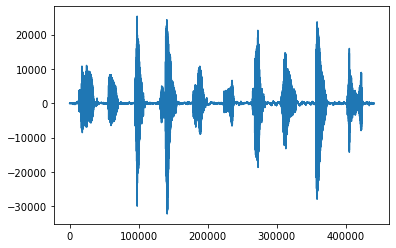

In [48]:
import matplotlib.pyplot as pl
pl.plot(x)

In [58]:
abs(x).max()

32259

CompletedProcess(args='ffplay.exe  rySound_2.wav', returncode=0)

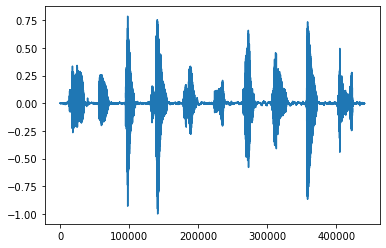

In [59]:

#y= x/ 1000
y= x / abs(x).max()

pl.plot(y)

import scipy.io.wavfile

scipy.io.wavfile.write('rySound_2.wav', 44100, y)

cmd= 'ffplay.exe  rySound_2.wav'
subprocess.run(cmd)


In [47]:
import subprocess

cmd= 'ffplay.exe  rySound.wav'

subprocess.run(cmd)

CompletedProcess(args='ffplay.exe  rySound.wav', returncode=0)

b'"\x00\x1d\x00\x03\x00\x0e\x00\x1c\x00'

In [ ]:
#%%
import wave

with wave.open(filename, "rb") as fp:

    nchannels= fp.getnchannels()
    nframes=   fp.getnframes()
    sampwidth= fp.getsampwidth()
    framerate= fp.getframerate()
    
    x2= fp.readframes(nframes)




#%%
import scipy.io.wavfile  as wf

sample_rate, ys= wf.read(filename)

pl.plot(ys)

#%%
import librosa as lb

ys1, sample_rate= lb.load(filename, sr= None)

pl.plot(ys1)

#%%

# struct — Interpret bytes as packed binary data

# https://docs.python.org/3/library/struct.html

import struct

hdr00_12=   struct.unpack('12s', hdr[ 0:12])
hdr12_36=   struct.unpack('24s', hdr[12:36])
hdr36_44=   struct.unpack('8s',  hdr[36:44])
dat00_10=   struct.unpack('10h',  x1[ 0:20])

'''
hdr12_36
Out[103]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr00_12
Out[104]: (b'RIFFtu\r\x00WAVE',)

hdr12_36
Out[105]: (b'fmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00',)

hdr36_44
Out[106]: (b'dataPu\r\x00',)

dat00_10
Out[107]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)
'''
#
# compare data0 with ys[0:10]
#
'''
dat00_10
Out[78]: (-3, 18, -1, -15, 4, 6, -12, 18, 9, 2)

ys[0:10]
Out[79]: array([ -3,  18,  -1, -15,   4,   6, -12,  18,   9,   2], dtype=int16)
'''